# Expedia Case Study

In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_csv('case_study_data.csv')

In [94]:
df.head()

,search_date,arrival,departure,num_adults,num_children,search_id,hotel_id,hotel_price,is_promo,hotel_feature_1,hotel_feature_2,hotel_feature_3,hotel_feature_4,hotel_feature_5,booked
0,25,457,471,3,2,0,517,1724.38,0,64.490309,85.0,7,0,0,0
1,25,457,471,3,2,0,517,1724.38,0,64.490309,85.0,7,0,0,0
2,25,457,471,3,2,0,29771,1905.54,1,25.826343,52.0,13,1,1,0
3,25,458,463,2,0,1,517,2077.95,0,64.490309,85.0,9,0,0,0
4,25,458,463,2,0,1,40744,6822.10,0,24.959968,52.0,11,1,2,0


In [95]:
df['stay_length'] = df['departure'] - df['arrival']

In [96]:
df['stay_length'].min()

1

In [97]:
df.describe()

,search_date,arrival,departure,num_adults,num_children,search_id,hotel_id,hotel_price,is_promo,hotel_feature_1,hotel_feature_2,hotel_feature_3,hotel_feature_4,hotel_feature_5,booked,stay_length
count,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,45445.000000,46322.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000
mean,11.734517,126.788046,134.479902,2.370570,0.812335,5509.648659,23095.564302,2599.055621,0.501490,76.849742,63.108847,59.068729,5.982335,2.357601,0.006603,7.691856
std,7.336887,90.867556,92.517336,0.912667,0.949223,4460.689701,13480.392766,4490.091588,0.500003,41.747830,22.846125,51.378153,6.014773,1.811249,0.080990,4.336129
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.370000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,49.000000,54.000000,2.000000,0.000000,1656.000000,11474.000000,559.400000,0.000000,46.238512,52.000000,16.000000,1.000000,1.000000,0.000000,5.000000
50%,12.000000,109.000000,116.000000,2.000000,0.000000,4488.000000,23309.000000,1336.600000,1.000000,67.712628,52.000000,46.000000,4.000000,1.000000,0.000000,7.000000
75%,17.000000,187.000000,197.000000,3.000000,2.000000,8727.000000,33668.000000,3090.510000,1.000000,128.117134,90.000000,86.000000,9.000000,4.000000,0.000000,10.000000
max,25.000000,493.000000,501.000000,8.000000,6.000000,16015.000000,46647.000000,175454.410000,1.000000,143.777606,100.000000,287.000000,36.000000,7.000000,1.000000,28.000000


In [98]:
# Note: We have some missing data for hotel_feature_1 and hotel_feature_2

## Cleaning The Data

### Missing Values

First let's remove any rows with missing data

In [99]:
print "Number of missing hotel_feature_1 entries: " + str(len(df[np.isnan(df['hotel_feature_1'])]))
print "Number of missing hotel_feature_2 entries: " + str(len(df[np.isnan(df['hotel_feature_2'])]))

Number of missing hotel_feature_1 entries: 1202
Number of missing hotel_feature_2 entries: 325


In [100]:
df[np.isnan(df['hotel_feature_1'])].head()

,search_date,arrival,departure,num_adults,num_children,search_id,hotel_id,hotel_price,is_promo,hotel_feature_1,hotel_feature_2,hotel_feature_3,hotel_feature_4,hotel_feature_5,booked,stay_length
232,20,51,52,2,0,21,4099,177.75,0,NaN,52.0,9,13,4,0,1
275,20,51,52,2,0,21,42149,160.99,1,NaN,95.0,27,1,0,0,1
515,20,78,81,2,1,29,4099,1993.71,0,NaN,52.0,11,13,4,0,3
520,20,78,81,2,1,29,42149,1682.63,1,NaN,95.0,31,1,0,0,3
531,23,315,320,4,0,31,42149,561.95,1,NaN,95.0,43,1,0,0,5


For now we are just going to remove all rows that have missing data (in the future I might interpolate and fill in missing values with the mean)

In [101]:
len(df[df['booked'] == 1])

308

In [102]:
df = df[np.isnan(df['hotel_feature_1']) != True]
df = df[np.isnan(df['hotel_feature_2']) != True]

In [103]:
len(df)
len(df[df['booked'] == 1])

299

So I have lost 9 of the "booked = 1" rows (which is only 1/30th of the set)

# Graphing Data to Explore It

Now let's graph the columns of df to see if we have any strange looking values

### Search Date

In [65]:
search_date = df.groupby('search_date').size()
search_date

search_date
0     2071
1     2178
2     1743
3     2355
4     2351
6     1989
7     1739
8     1685
9     1627
10    2010
11    2705
12    2323
13    2344
14    2014
15    1526
16    1403
17    2150
19    2044
20    2135
21    1966
23    1307
24    1869
25    1586
dtype: int64

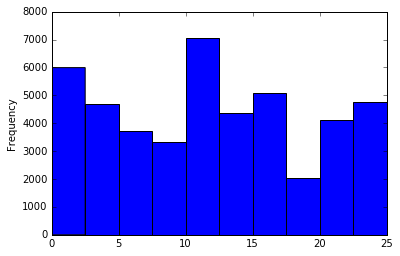

In [68]:
df['search_date'].plot.hist(orientation='vertical')

### Arrival and Departure

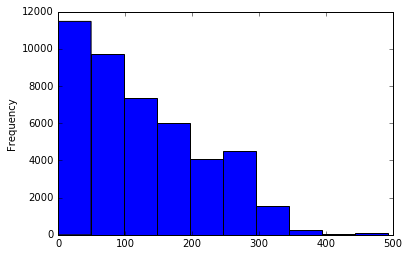

In [69]:
df['arrival'].plot.hist(orientation='vertical')


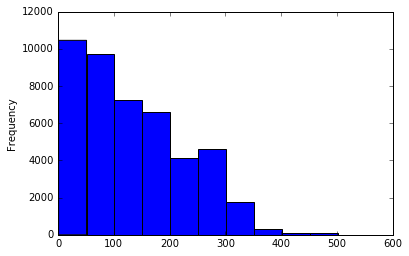

In [70]:
df['departure'].plot.hist(orientation='vertical')

### Number of Adults and Children

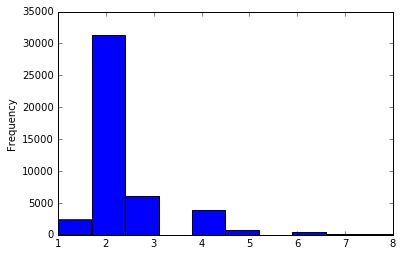

In [71]:
df['num_adults'].plot.hist(orientation='vertical')

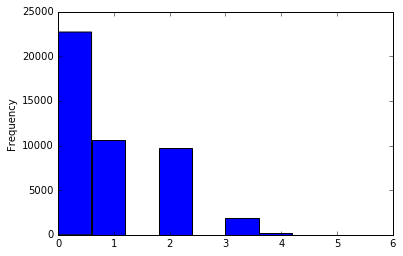

In [88]:
df['num_children'].plot.hist(orientation='vertical')

Do the gaps in the above histograms suggest that there is a

### Number of Hotels

In [80]:
print "The number of hotels in our dataset is " + str(len(df['hotel_id'].unique()))

The number of hotels in our dataset is 343


### Is_Promo Ratio

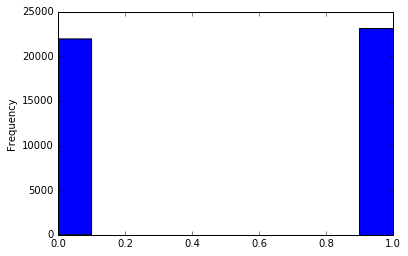

In [81]:
df['is_promo'].plot.hist(orientation='vertical')

## Hotel Features

#### Hotel Feature 2

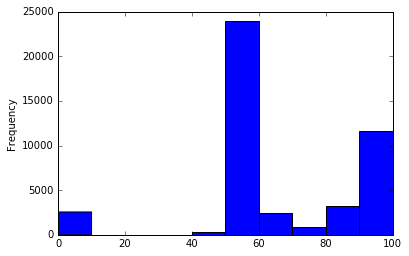

In [82]:
df['hotel_feature_2'].plot.hist(orientation='vertical')

#### Hotel Feature 3

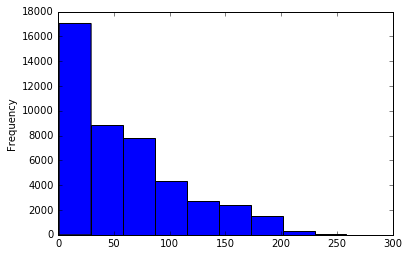

In [83]:
df['hotel_feature_3'].plot.hist(orientation='vertical')

#### Hotel Feature 4

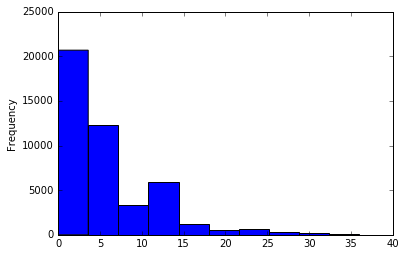

In [84]:
df['hotel_feature_4'].plot.hist(orientation='vertical')

#### Hotel Feature 5

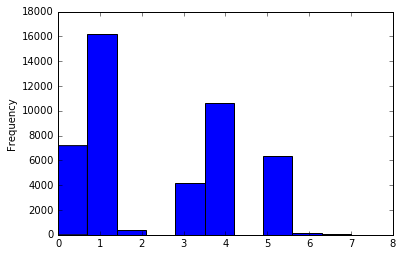

In [85]:
df['hotel_feature_5'].plot.hist(orientation='vertical')

## Booked

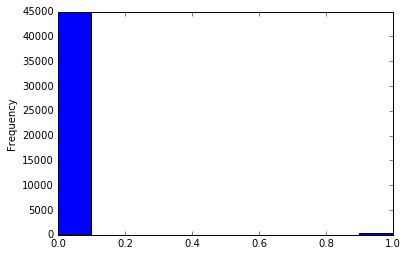

In [86]:
df['booked'].plot.hist(orientation='vertical')

## Stay Length

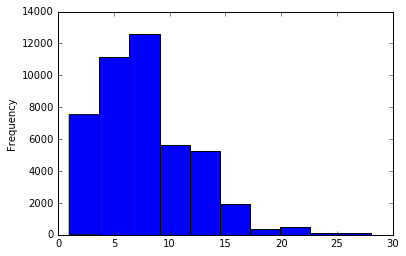

In [87]:
df['stay_length'].plot.hist(orientation='vertical')